In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
!pip install -U textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [2]:
from textblob import TextBlob

In [3]:
em = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 16\\Elon_musk.csv", encoding = "ISO-8859-1")
em

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
em.rename( columns={'Unnamed: 0':'count'}, inplace=True )

In [5]:
em.head()

,count,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
em.isnull().sum()

count    0
Text     0
dtype: int64

In [7]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   1999 non-null   int64 
 1   Text    1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [8]:
em.describe

<bound method NDFrame.describe of       count                                               Text
0         1                             @kunalb11 Im an alien
1         2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2         3                @joerogan @Spotify Great interview!
3         4                    @gtera27 Doge is underestimated
4         5  @teslacn Congratulations Tesla China for amazi...
...     ...                                                ...
1994   1995  @flcnhvy True, it sounds so surreal, but the n...
1995   1996  @PPathole Make sure to read ur terms &amp; con...
1996   1997                @TeslaGong @PPathole Samwise Gamgee
1997   1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998   1999                          Progress update August 28

[1999 rows x 2 columns]>

In [9]:
len(em.index)

1999

In [10]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (em.Text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

In [12]:
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
##Converting all review into Lowercase..###
em['Text'] = em['Text'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [16]:
## removing punctuation from review..#
import string
em['Text'] = em['Text'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [17]:
## Remove Numbers from tweets...##
em['Text'] = em['Text'].str.replace('[0-9]','')

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words=stopwords.words('english')

In [20]:
import re #regular expression
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)

In [21]:
em.head()

,count,Text
0,1,kunalb im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview
3,4,gtera doge is underestimated
4,5,teslacn congratulations tesla china for amazin...


In [22]:
from textblob import TextBlob
from textblob import Word

In [23]:
em['Text']= em['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [24]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
em['Text']= em['Text'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [25]:
text_set = em['Text']

In [26]:
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [27]:
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [28]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(em['Text'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aber  able  abo  aboard  abort  about  above  absence  absolute  \
0        0     0    0       0      0      0      0        0         0   
1        0     0    0       0      0      0      0        0         0   
2        0     0    0       0      0      0      0        0         0   
3        0     0    0       0      0      0      0        0         0   
4        0     0    0       0      0      0      0        0         0   
...    ...   ...  ...     ...    ...    ...    ...      ...       ...   
1994     0     0    0       0      0      0      0        0         0   
1995     0     0    0       0      0      0      0        0         0   
1996     0     0    0       0      0      0      0        0         0   
1997     0     0    0       0      0      0      0        0         0   
1998     0     0    0       0      0      0      0        0         0   

      absolutely  ...  zikryzamir  zip  zogfotpik  zon  zone  zshauladventure  \
0              0  ...           0    0    

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(em['Text'])
print(TFIDF)

  (0, 116)	0.6015864260575786
  (0, 154)	0.418460945392174
  (0, 2710)	0.6804294299666626
  (1, 2582)	0.1580273249903494
  (1, 4593)	0.3155285492324564
  (1, 4999)	0.19340020625851947
  (1, 1660)	0.20436805464069
  (1, 3176)	0.35570089687506157
  (1, 2575)	0.13385680675084746
  (1, 1667)	0.37492493371191143
  (1, 4941)	0.18579799104955733
  (1, 896)	0.3228371888371105
  (1, 3270)	0.1792479645667113
  (1, 4570)	0.37492493371191143
  (1, 3658)	0.37492493371191143
  (1, 2439)	0.2434701015601069
  (2, 2557)	0.5043290017718325
  (2, 1594)	0.3080284702583498
  (2, 4171)	0.5704255952716918
  (2, 2631)	0.5704255952716918
  (3, 4697)	0.596806822457671
  (3, 1057)	0.4921816913727542
  (3, 1613)	0.596806822457671
  (3, 2575)	0.21307373374822786
  (4, 3083)	0.206866253112436
  :	:
  (1995, 696)	0.3773117446136169
  (1995, 4394)	0.3442388228116227
  (1995, 771)	0.3579653255701671
  (1995, 380)	0.31116590100962854
  (1995, 3507)	0.18038907564646967
  (1995, 2904)	0.23319476791676017
  (1995, 4747)	0

In [61]:
!pip install wordcloud

In [30]:
from wordcloud.wordcloud import WordCloud

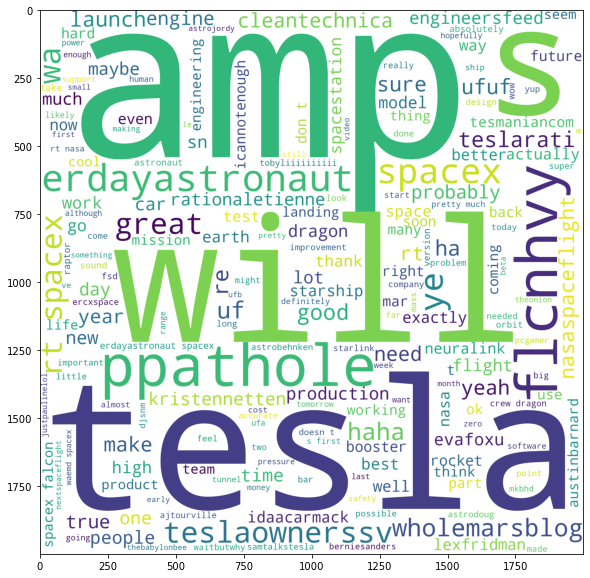

In [31]:
Review_wordcloud = ' '.join(em['Text'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)
plt.show()

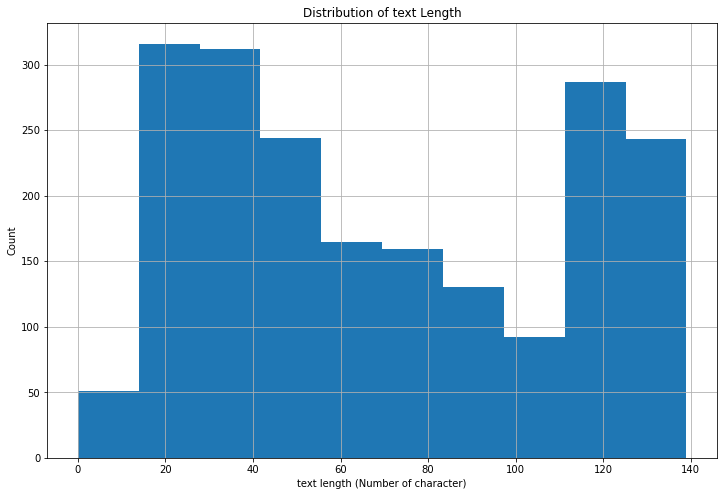

In [32]:
text_length = em["Text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')
plt.show()

In [34]:
em['polarity'] = em['Text'].apply(lambda x: TextBlob(x).sentiment[0])
em[['Text','polarity']].head(5)

,Text,polarity
0,kunalb im an alien,-0.250
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000
2,joerogan spotify great interview,0.800
3,gtera doge is underestimated,0.000
4,teslacn congratulation tesla china for amazing...,0.275


In [35]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [36]:
sent_type(em['polarity'])

negative
neutral
positive
neutral
positive
positive
neutral
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
negative
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
negative
neutral
neutral
neutral
negative
neutral
neutral
negative
positive
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutr

positive
positive
positive
positive
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
positive
negative
positive
positive
positive
neutral
neutral
positive
neutral
positive
positive
positive
neutral
negative
neutral
positive
positive
positive
neutral
neutral
positive
positive
negative
negative
positive
negative
neutral
neutral
neutral
neutral
positive
positive
negative
positive
neutral
neutral
positive
negative
positive
positive
neutral
neutral
neutral
positive
positive
positive
positive
positive
neutral
positive
neutral
positive
neutral
negative
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
negative
neutral
neutral
negative
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
positive
neutral
positive
positive
neutral
neutral
positive
positive
positive
neutral
neutral
positive
negative
negative
positive
negative
positive
posi

In [38]:
em["category"] = em['polarity']

em.loc[em.category > 0,'category']="Positive"
em.loc[em.category !='Positive','category']="Negative"

em["category"] = em["category"].astype('category')
em.dtypes

count          int64
Text          object
polarity     float64
category    category
dtype: object

In [40]:
em.category.value_counts(normalize=True).mul(100)

Negative    55.627814
Positive    44.372186
Name: category, dtype: float64

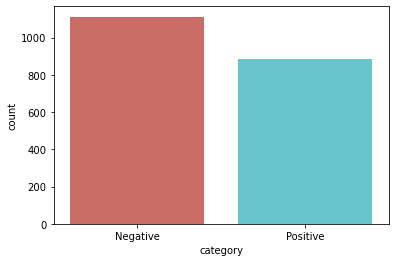

In [44]:
sns.countplot(x='category',data = em,palette='hls')
plt.show()

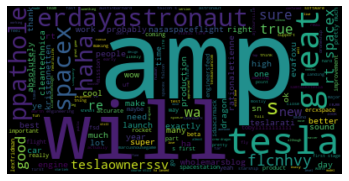

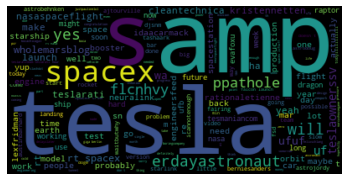

In [45]:
positive_reviews= em[em.category=='Positive']
negative_reviews= em[em.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Text.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Text.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
